In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix, cohen_kappa_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import math
from joblib import dump, load
from helper import index as slowHelpers
import random
import pickle

from helper import fast as fs
from skimage.restoration import denoise_bilateral
from PIL import Image
import scipy.ndimage.morphology as morph

In [24]:
def foo(list_of_zones):
    frames = np.empty(len(list_of_zones), dtype=object)
    for i, zone_file_name in enumerate(list_of_zones):
        zone = pd.read_pickle(zone_file_name)
        #mask = masks[i] 
        
        mask = slowHelpers.createBalancedMask(morph.binary_dilation(zone["label_3m"].values.reshape((2997,2620)), structure=slowHelpers.create_circular_mask(1)), 3, 5)
        
        mask = np.where(np.invert(mask.reshape(-1)))
        
        zone.drop(zone.index[mask], inplace=True)
        frames[i] = zone
    return pd.concat(frames)

In [4]:
def fooNew(list_of_zones):
    frames = np.empty(len(list_of_zones), dtype=object)
    for i, zone_file_name in enumerate(list_of_zones):
        zone = pd.read_pickle(zone_file_name)
        #mask = masks[i] 
        
        mask = slowHelpers.createBalancedMaskNew(morph.binary_dilation(zone["label_3m"].values.reshape((2997,2620)), structure=slowHelpers.create_circular_mask(1)), 1, 1)
        
        mask = np.where(np.invert(mask.reshape(-1)))
        
        zone.drop(zone.index[mask], inplace=True)
        frames[i] = zone
    return pd.concat(frames)

In [ ]:
#dataset = foo(["zone_1.pickle","zone_2.pickle","zone_3.pickle","zone_4.pickle","zone_5.pickle","zone_6.pickle", "zone_7.pickle", "zone_9.pickle"])
dataset = foo(["../zones_features_final/zone_1.pickle", "../zones_features_final/zone_2.pickle", "../zones_features_final/zone_3.pickle", "../zones_features_final/zone_4.pickle", "../zones_features_final/zone_5.pickle", "../zones_features_final/zone_6.pickle"])
#dataset = fooNew(["../zones_features_final/zone_1.pickle"])

in function
in function


In [ ]:
X_train = dataset.loc[:, dataset.columns != "label_3m"]
y_train = dataset["label_3m"]

In [ ]:
y_train.shape

In [ ]:
compute_class_weight("balanced", np.array([0,1]), y_train)

In [36]:
clf = RandomForestClassifier(n_estimators=200, n_jobs=-1)


clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
[estimator.tree_.max_depth for estimator in clf.estimators_]

[56,
 60,
 58,
 52,
 58,
 58,
 60,
 55,
 50,
 55,
 57,
 62,
 53,
 59,
 56,
 56,
 61,
 64,
 63,
 56,
 64,
 56,
 62,
 54,
 56,
 53,
 66,
 62,
 53,
 57,
 58,
 63,
 59,
 53,
 66,
 58,
 55,
 54,
 55,
 72,
 63,
 55,
 55,
 54,
 55,
 57,
 60,
 53,
 55,
 54,
 55,
 54,
 55,
 54,
 56,
 56,
 65,
 54,
 53,
 56,
 56,
 56,
 57,
 58,
 60,
 56,
 57,
 60,
 61,
 60,
 57,
 58,
 53,
 55,
 67,
 69,
 56,
 54,
 51,
 57,
 60,
 53,
 58,
 53,
 59,
 58,
 58,
 53,
 61,
 59,
 59,
 59,
 57,
 59,
 58,
 58,
 63,
 60,
 57,
 58,
 54,
 54,
 55,
 52,
 58,
 54,
 53,
 51,
 55,
 59,
 53,
 52,
 64,
 55,
 55,
 56,
 66,
 53,
 56,
 53,
 60,
 53,
 55,
 66,
 49,
 58,
 51,
 60,
 58,
 62,
 59,
 59,
 58,
 51,
 60,
 55,
 65,
 53,
 62,
 59,
 61,
 58,
 58,
 66,
 56,
 54,
 53,
 57,
 54,
 52,
 59,
 59,
 51,
 58,
 61,
 53,
 53,
 62,
 55,
 53,
 55,
 51,
 60,
 59,
 60,
 62,
 53,
 57,
 55,
 58,
 60,
 60,
 55,
 54,
 55,
 68,
 56,
 53,
 59,
 55,
 54,
 49,
 57,
 55,
 56,
 61,
 56,
 56,
 65,
 58,
 62,
 60,
 55,
 55,
 54,
 54,
 55,
 53,
 62,
 56]

In [5]:
#dump(clf, "classifiers/190427_RF_Classifier_zone_1_2_3_4_5_6_200trees_balanced99percent_82features_9pixelwidth.joblib")
clf = load("classifiers/190427_RF_Classifier_zone_1_2_3_4_5_6_200trees_balanced99percent_82features_9pixelwidth.joblib")
#clf = load("classifier_newmask_200.joblib")

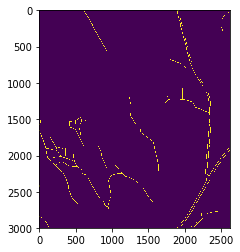

In [6]:
datasetZone10 = pd.read_pickle("../zones_features_final/zone_11.pickle")
X_test = datasetZone10.loc[:, datasetZone10.columns != "label_3m"]
y_test = datasetZone10["label_3m"]
plt.imshow(y_test.values.reshape((2997,2620)))

In [7]:
X_test

hpmf_raw  skyview_raw  impundment_raw  slope_raw  \
0            0.02     0.977687        0.000000  10.538413   
1           -0.04     0.988127        0.000000   8.294299   
2           -0.08     0.984799        0.008789   9.514884   
3           -0.09     0.979150        0.048218   9.598948   
4           -0.13     0.982848        0.059906   7.543435   
5           -0.13     0.978559        0.153992   8.598925   
6           -0.09     0.980763        0.143341  11.372722   
7           -0.10     0.987878        0.095215   8.860470   
8           -0.12     0.983140        0.152069   9.396853   
9           -0.06     0.977978        0.117310  13.014007   
10           0.01     0.976587        0.016571  14.253403   
11           0.05     0.974671        0.000000  16.110767   
12           0.04     0.973245        0.000000  15.710443   
13           0.01     0.960935        0.102966  14.580770   
14          -0.03     0.985386        0.055237  11.161658   
15          -0.06     0.982278        0.069916   8.697126   
16          -0.04     0.983760        0.018799   9.736614   
17          -0.03     0.988786        0.026337   9.105206   
18           0.00     0.990236        0.000000   7.021726   
19           0.00     0.990833        0.023376   7.434522   
20           0.03     0.989958        0.000000   8.324963   
21           0.04     0.991055        0.002167   7.798515   
22           0.06     0.992744        0.000000   6.215115   
23           0.06     0.993281        0.000000   4.424990   
24           0.06     0.991758        0.000000   3.014014   
25           0.05     0.988205        0.004456   4.653288   
26           0.02     0.988222        0.024353   7.946510   
27           0.00     0.987986        0.027679   9.584083   
28          -0.02     0.988301        0.035461   9.333510   
29          -0.04     0.985076        0.071259   9.799262   
...           ...          ...             ...        ...   
7852110     -0.18     0.903926        0.000000  25.351545   
7852111     -0.01     0.863280        0.068314  31.648615   
7852112      0.00     0.852710        0.030243  35.957195   
7852113     -0.12     0.885382        0.133331  23.710485   
7852114     -0.09     0.924541        0.000000  20.865440   
7852115     -0.10     0.906305        0.000000  23.763071   
7852116     -0.01     0.927314        0.003357  19.544773   
7852117     -0.08     0.903702        0.116943  24.594547   
7852118     -0.09     0.851137        0.000000  31.667521   
7852119     -0.15     0.850875        0.143845  25.902140   
7852120     -0.13     0.924661        0.176636   8.227819   
7852121      0.00     0.923209        0.010025   1.982021   
7852122      0.06     0.938543        0.000000   7.420525   
7852123      0.06     0.938578        0.000000  18.450718   
7852124      0.04     0.926135        0.000000  21.904255   
7852125      0.05     0.926882        0.000000  21.979515   
7852126      0.04     0.926889        0.000000  20.884853   
7852127      0.09     0.930762        0.000000  19.904312   
7852128      0.13     0.938226        0.000000  19.094139   
7852129      0.16     0.935242        0.000000  19.425068   
7852130      0.12     0.929033        0.000000  19.829725   
7852131     -0.01     0.944434        0.011414  10.083395   
7852132      0.02     0.934210        0.003738   1.360816   
7852133      0.05     0.943347        0.000000   3.133778   
7852134     -0.01     0.948987        0.044388   5.970287   
7852135     -0.07     0.948092        0.116516   3.136678   
7852136     -0.09     0.943562        0.106522   0.504128   
7852137     -0.08     0.935082      182.208435   4.087897   
7852138     -0.03     0.921148        0.039856   8.012467   
7852139      0.01     0.923354        0.000000   8.809324   

         DEM_ditch_detection  DEM_ditch_detection_no_streams  conic_mean  \
0                   0.533173                        0.533173    0.977687   
1                   0.543427                        0.543427    0.988127  

Accuracy score              0.956368327615
Recall score                0.726377308777
Area under curve score(AUC) 0.469466173877
Average precision score(AP) 0.155473564012
ROC                         0.843053402454
Cohen's kappa               0.308664229404
Confusion matrix
 [[7427384  311655]
 [  30947   82154]]


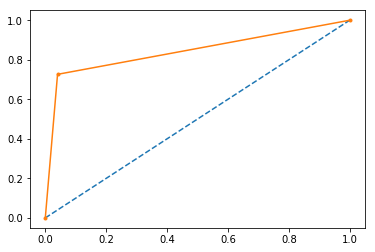

In [8]:
#from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
# auc, average_precision_score, f1_score
y_pred = clf.predict(X_test)
print("Accuracy score             ",accuracy_score(y_test,y_pred))
print("Recall score               ",recall_score(y_test,y_pred))

precision, recall, threshholds = precision_recall_curve(y_test,y_pred)
auc_score = auc(recall, precision)
print("Area under curve score(AUC)", auc_score)
ap = average_precision_score(y_test, y_pred)
print("Average precision score(AP)", ap)
print("ROC                        ", roc_auc_score(y_test, y_pred))

print("Cohen's kappa              ", cohen_kappa_score(y_test,y_pred))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred))


fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [62]:
importances = clf.feature_importances_
feature_names = dataset.columns.values.tolist()[1:]
tuple_features = [(feature_names[i], importance) for i, importance in enumerate(importances)]
tuple_features.sort(key=lambda x: x[1], reverse=True)

for f in range(X_test.shape[1]):
    print("{:>2}. {:<20}  {:.2f} %".format(f + 1, tuple_features[f][0], tuple_features[f][1]*100))

 1. impundment_mean_6     4.92 %
 2. impundment_mean_4     4.81 %
 3. impundment_mean_3     4.22 %
 4. impundment_mean_2     3.68 %
 5. impundment_median_4   3.38 %
 6. impundment_std_4      3.21 %
 7. hpmf_mean_4           2.97 %
 8. impundment_std_6      2.92 %
 9. hpmf_mean_3           2.21 %
10. impundment_amplified  2.16 %
11. impundment_max_2      2.14 %
12. impundment_median_6   2.10 %
13. impoundment_amplified_no_streams  1.92 %
14. slope_std_6           1.83 %
15. impundment_max_4      1.79 %
16. hpmf_mean_6           1.78 %
17. impundment_median_2   1.75 %
18. impundment_max_6      1.58 %
19. hpmf_gabor            1.57 %
20. hpmf_median_4         1.46 %
21. skyview_gabor         1.45 %
22. slope_non_ditch       1.35 %
23. hpmf_min_2            1.31 %
24. skyview_gabor_no_streams  1.30 %
25. impundment_std_2      1.24 %
26. slope_min_6           1.21 %
27. hpmf_gabor_no_streams  1.20 %
28. skyview_max_6         1.18 %
29. slope_median_6        1.17 %
30. hpmf_std_6            

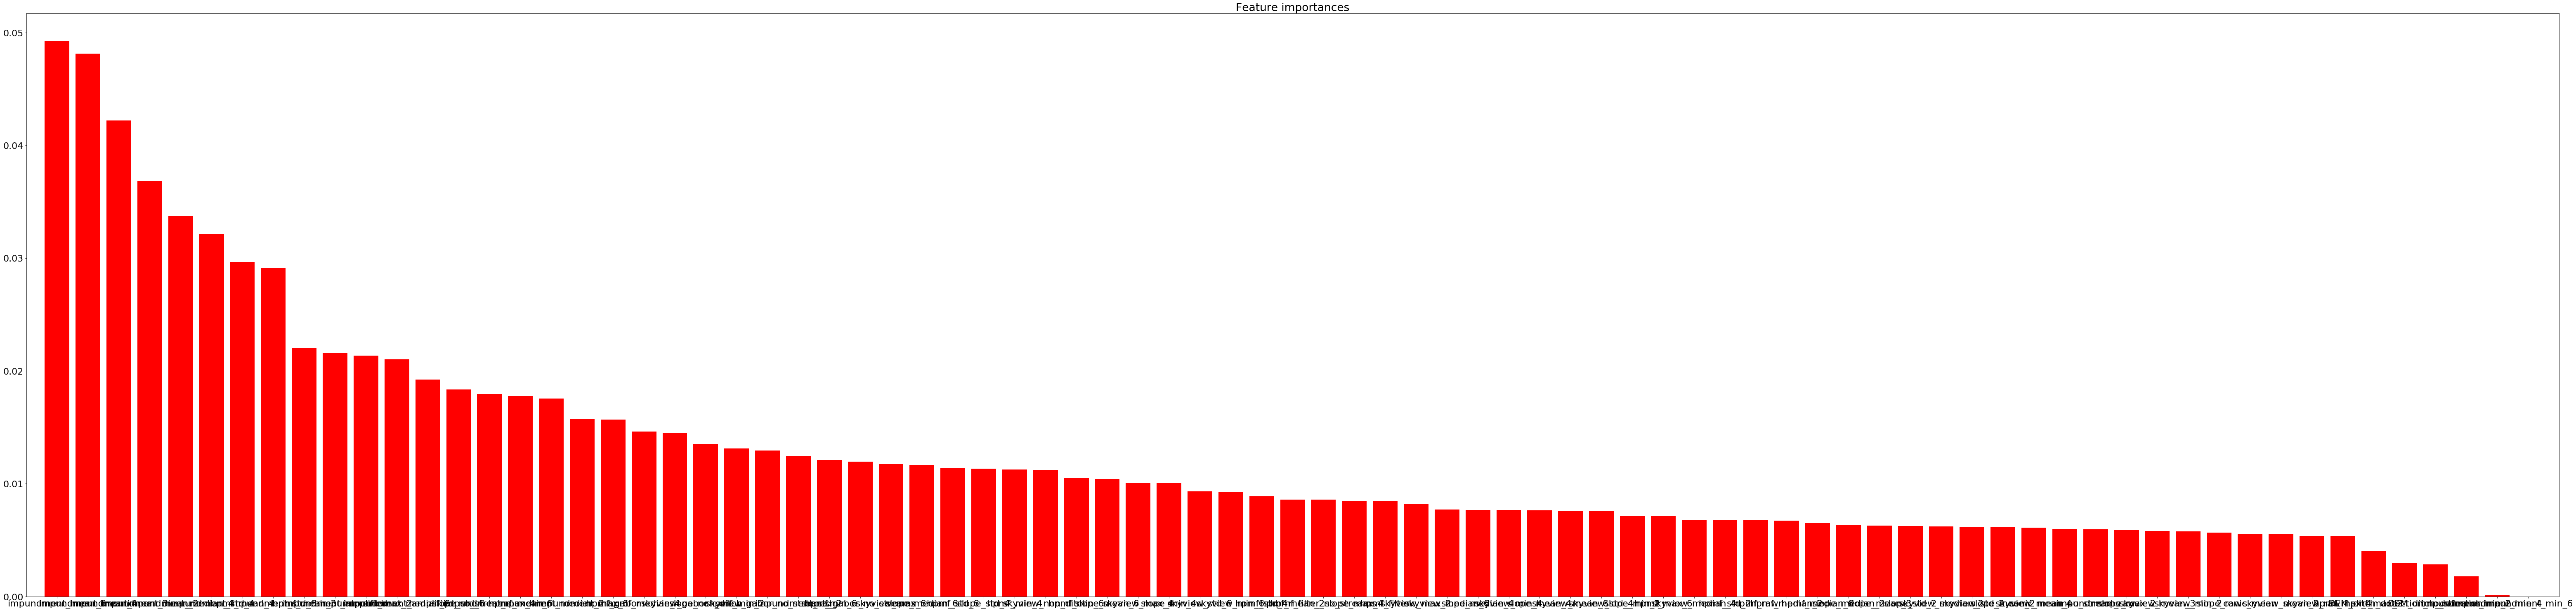

In [43]:
plt.figure(num=None, figsize=(110,26), facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), [x[1] for x in tuple_features],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), [x[0] for x in tuple_features])
plt.xlim([-1, X_train.shape[1]])
plt.show()

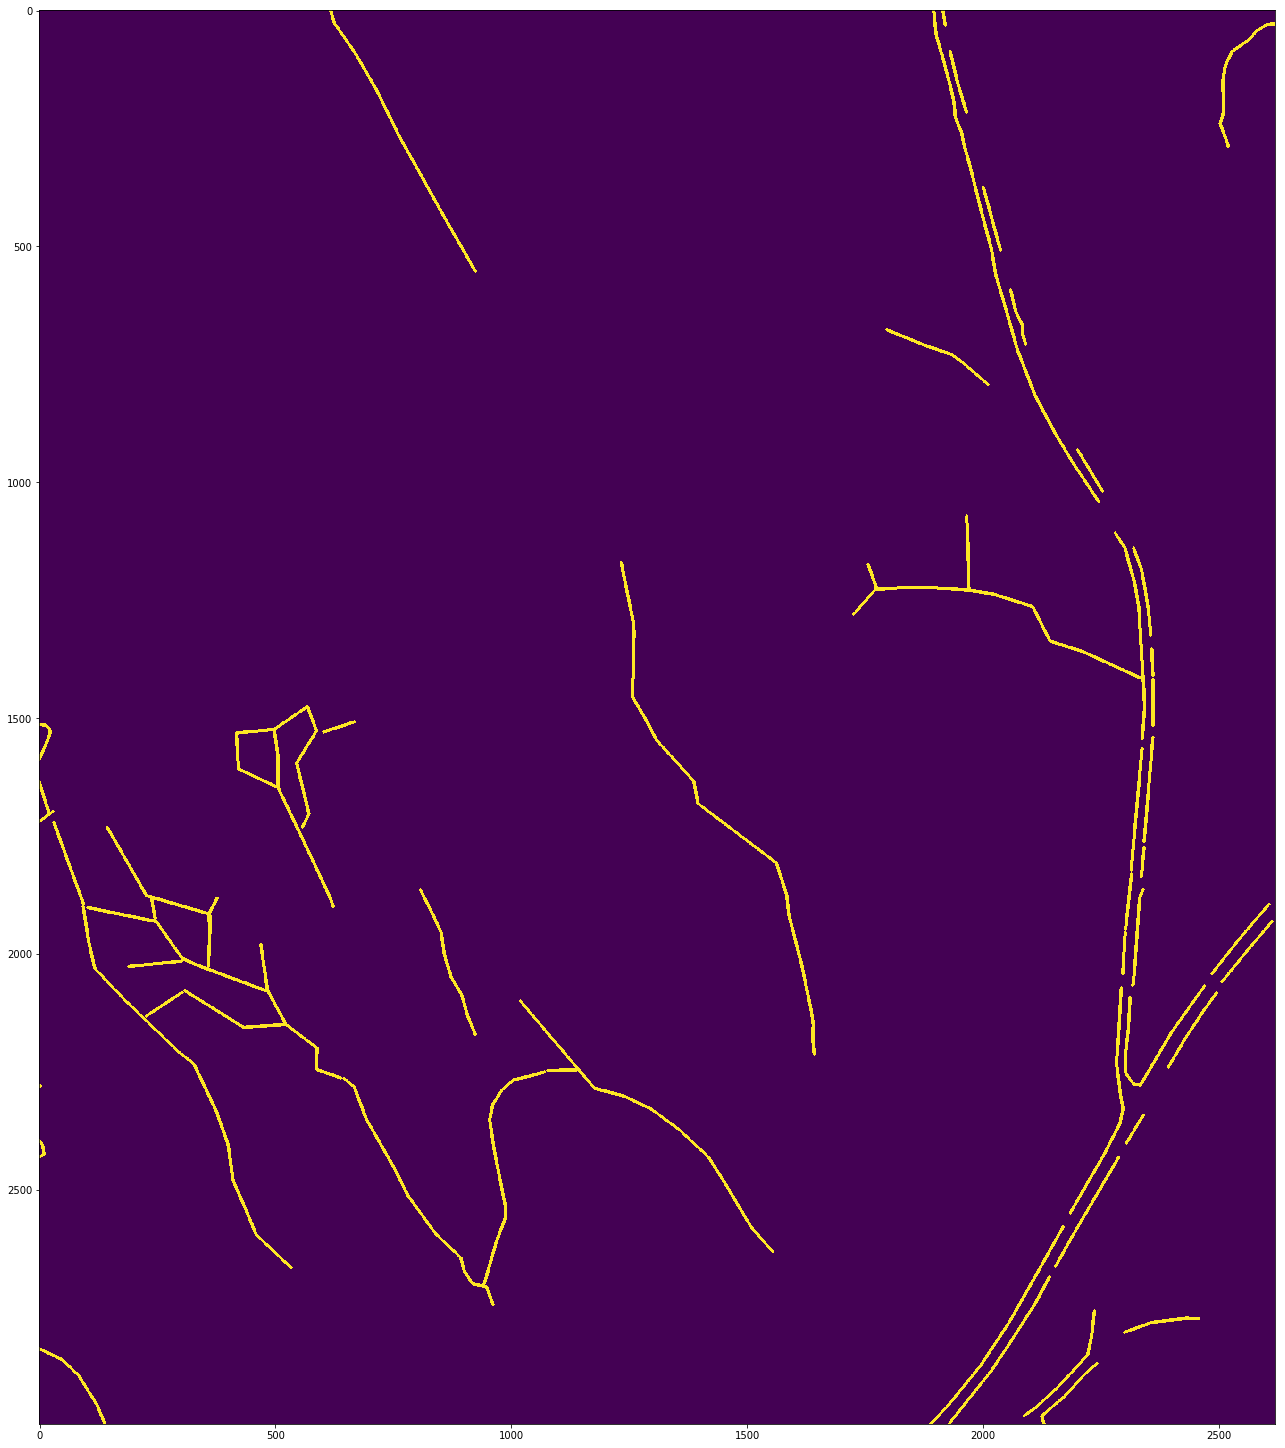

In [9]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(y_test.values.reshape(2997,2620))

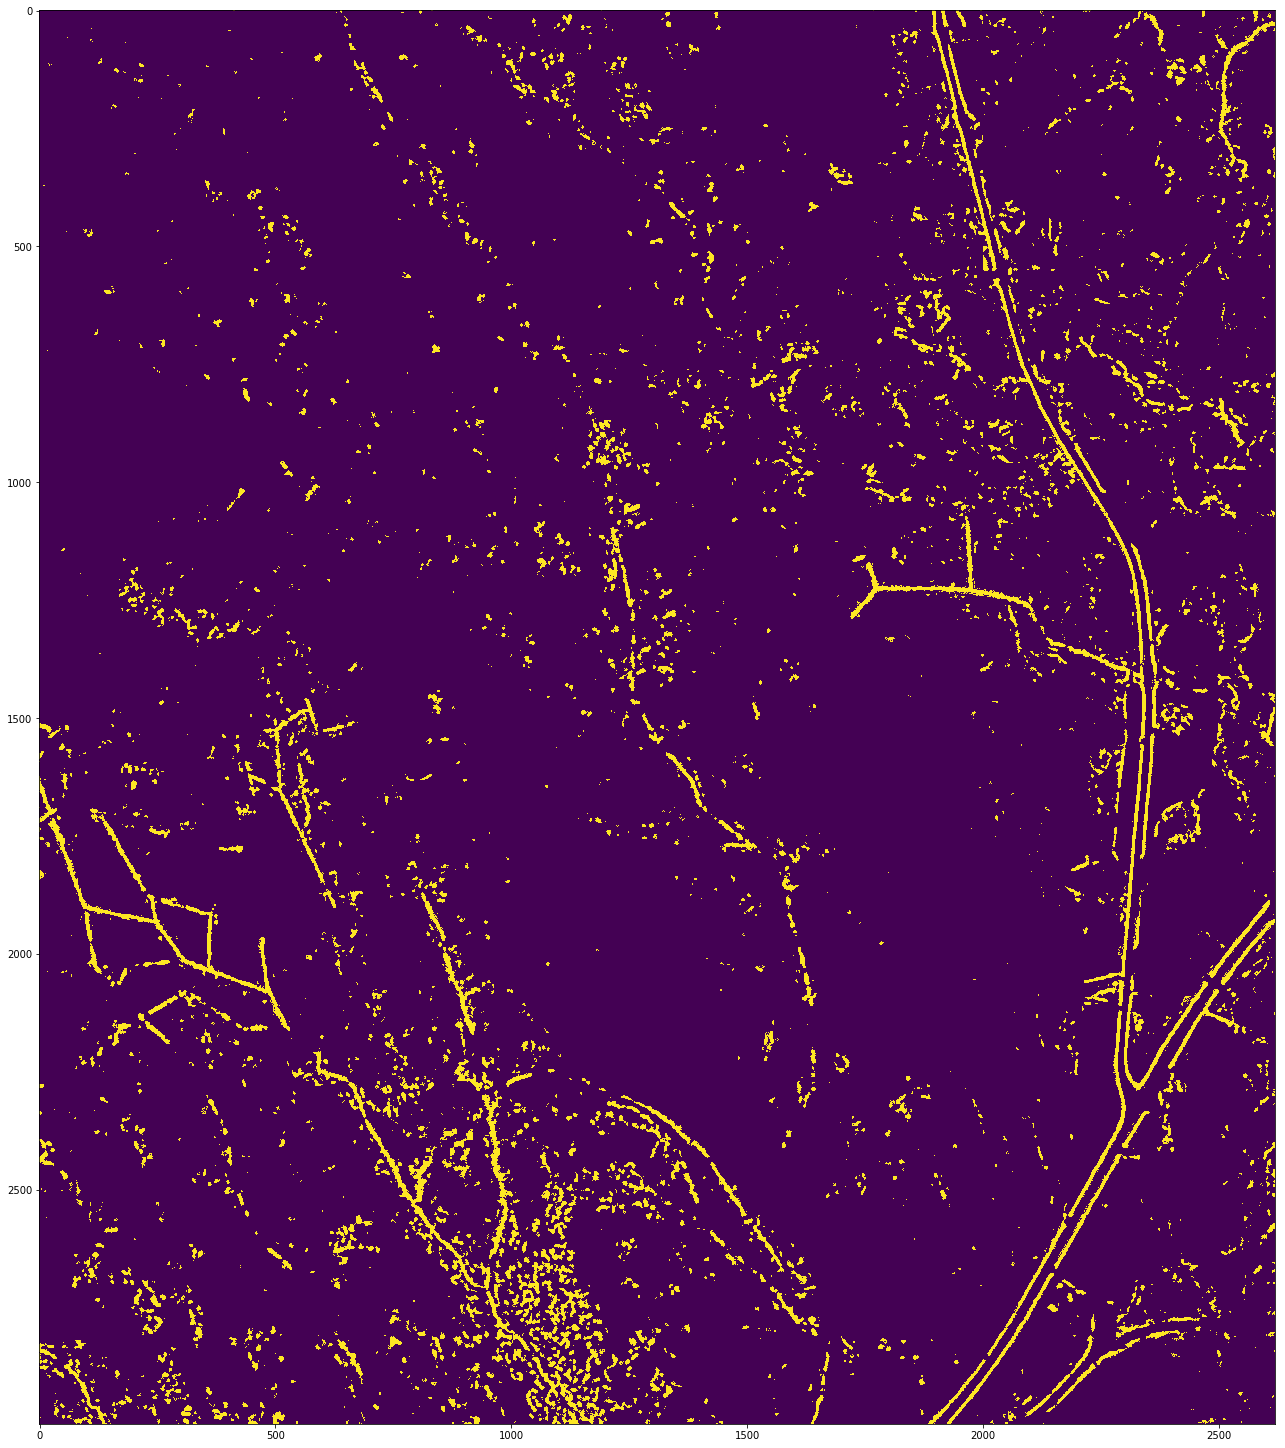

In [10]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(y_pred.reshape(2997,2620))

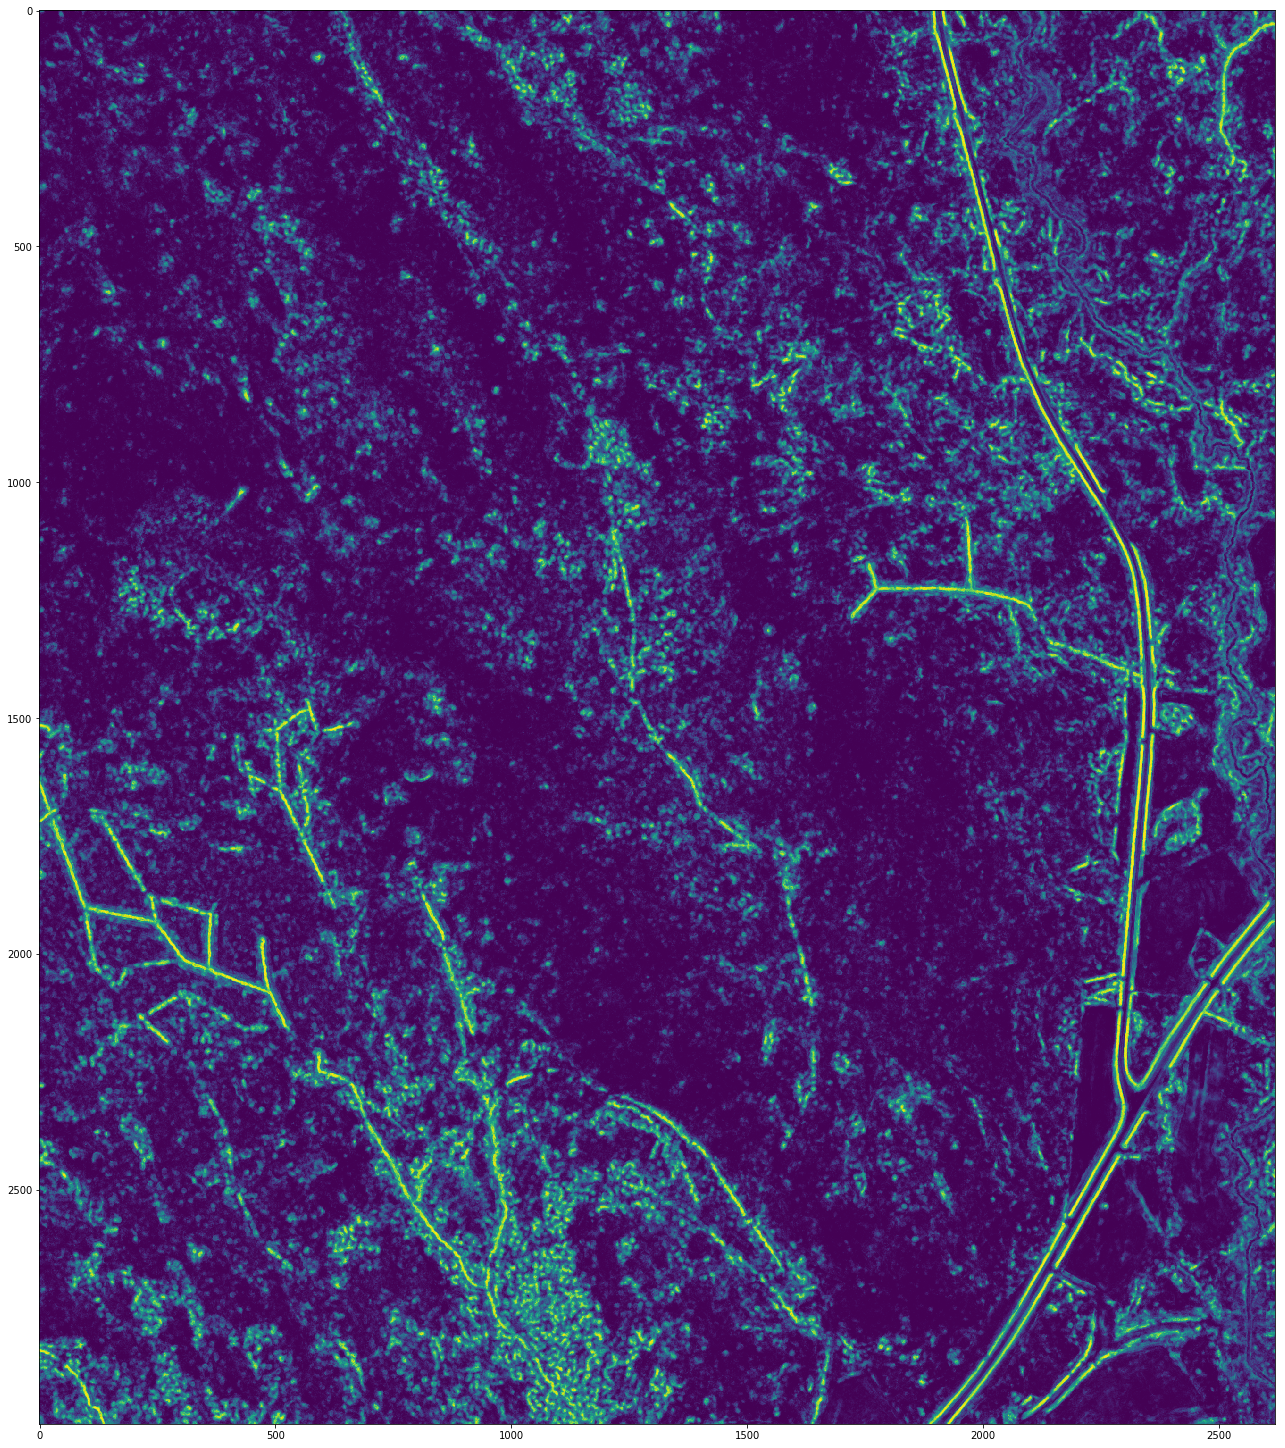

In [11]:
proba = clf.predict_proba(X_test)[:,1:].reshape(2997,2620)
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
#proba[proba > 0.3] = 1
#proba[proba < 0.3] = 0
plt.imshow(proba)

In [12]:
np.save("predictions/190427_test/190427_RF_Classifier_zone_1_2_3_4_5_6_200trees_balanced99percent_82features_9pixelwidth___Prediction_zone_11_proba.npy", proba)

In [13]:
#proba = np.load("predictions/190416_test/190416_RF_Classifier_zone_1_2_3_4_5_6_100trees_balanced99percent_55features___Prediction_zone_7_proba.npy")

In [14]:
%%time
proba_post_process = fs.probaPostProcess(proba, 6, 0.25)

started: 22 17
deNoise done: 22 22
gapFill done: 22 23
(2997, 2620)
probaToZone done: 22 23
Wall time: 6min 10s


In [15]:
np.save("predictions/190427_test/post_process_11.npy", proba_post_process)

In [16]:
#proba_post_process = np.load("predictions/190416_test/post_process.npy")

In [17]:
y_testZones = slowHelpers.rasterToZones(np.asarray(y_test).reshape(2997, 2620), 6, 4)

In [18]:
y_testZones1D = y_testZones.reshape(-1)

In [19]:
#y_pred = np.load("predictions/190416_test/step8_islands3.npy").reshape(-1)

Accuracy score              0.978224917029
Recall score                0.646825422262
Area under curve score(AUC) 0.559651107793
Average precision score(AP) 0.308088161408
ROC                         0.815883997043
Cohen's kappa               0.530507531473
Confusion matrix
 [[7580251  115884]
 [  55097  100908]]


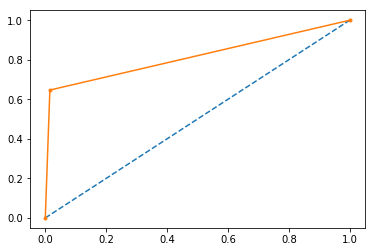

In [20]:
#from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
# auc, average_precision_score, f1_score
y_pred = proba_post_process.astype(int).reshape(-1)
print("Accuracy score             ", accuracy_score(y_testZones1D,y_pred))
print("Recall score               ", recall_score(y_testZones1D,y_pred))

precision, recall, threshholds = precision_recall_curve(y_testZones1D,y_pred)
auc_score = auc(recall, precision)
print("Area under curve score(AUC)", auc_score)
ap = average_precision_score(y_testZones1D, y_pred)
print("Average precision score(AP)", ap)
print("ROC                        ", roc_auc_score(y_testZones1D, y_pred))

print("Cohen's kappa              ", cohen_kappa_score(y_testZones1D,y_pred))
print("Confusion matrix\n", confusion_matrix(y_testZones1D,y_pred))


fpr, tpr, thresholds = roc_curve(y_testZones1D,y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

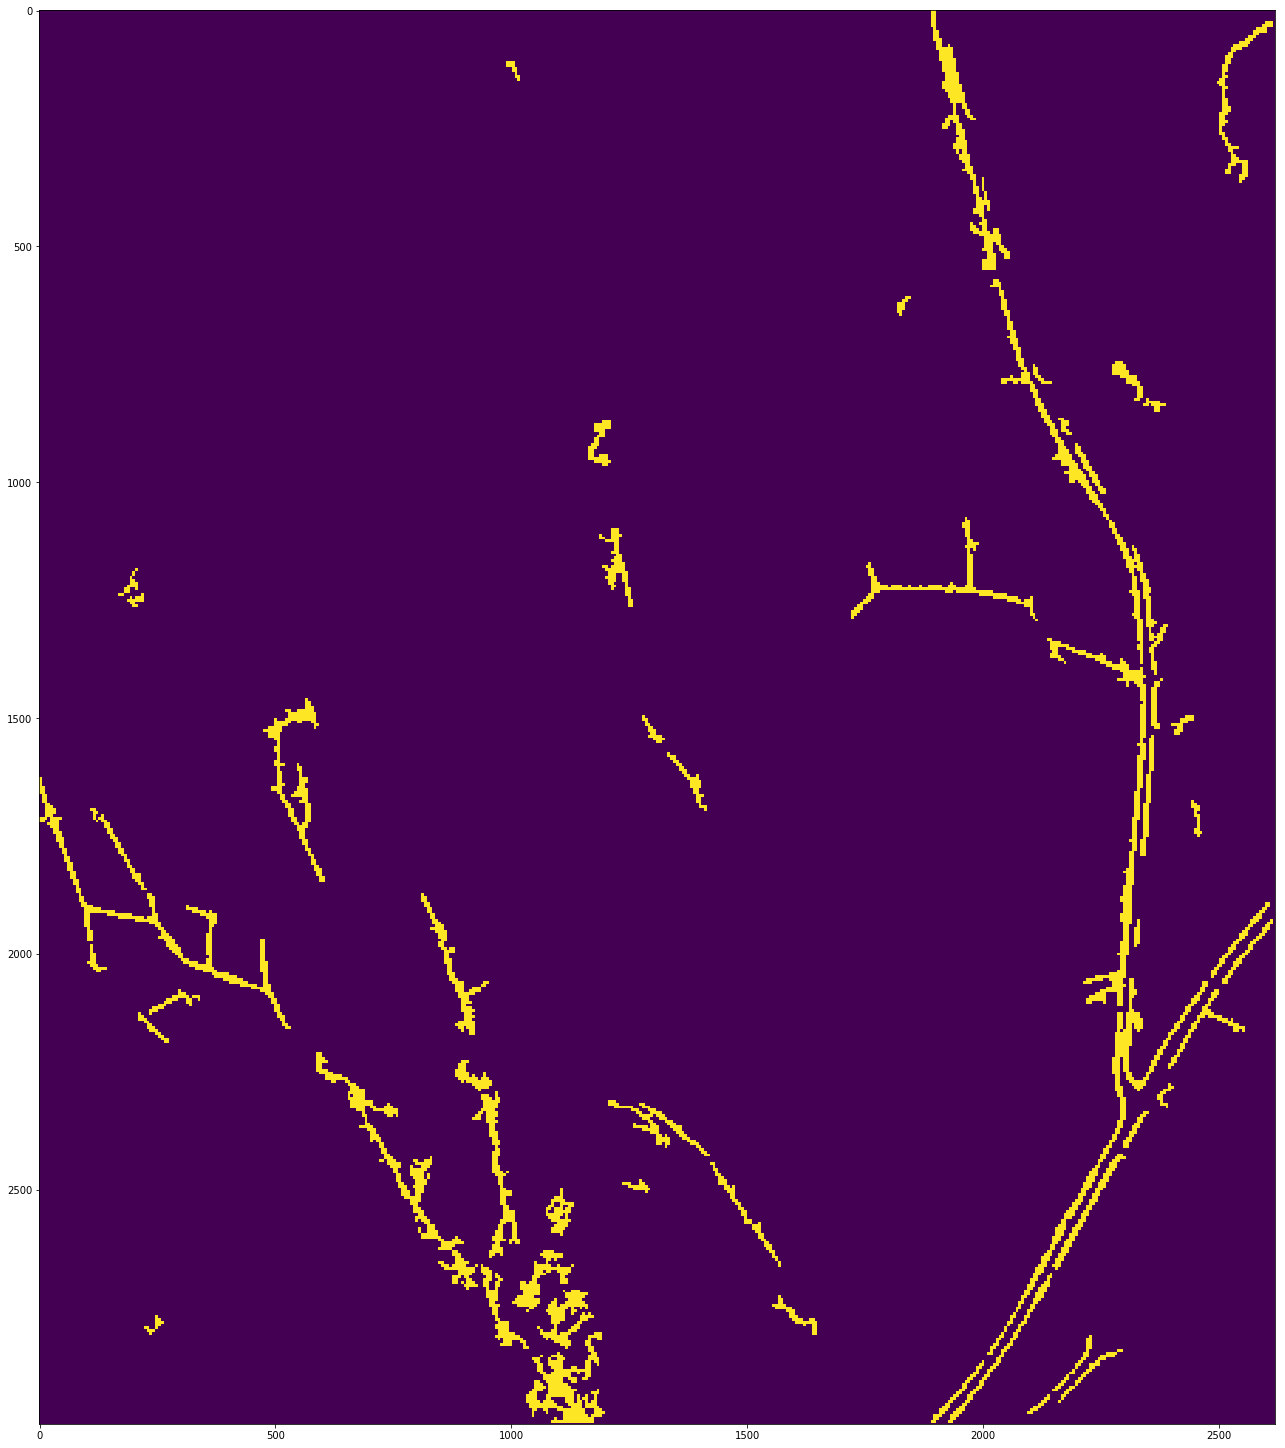

In [21]:
plt.figure(num=None, figsize=(28,26), facecolor='w', edgecolor='k')
plt.imshow(proba_post_process)

In [22]:
displayImg = Image.new("RGB", (2620, 2997), "black")
pixels = displayImg.load()
for i in range(displayImg.size[0]):
    for j in range(displayImg.size[1]):
        if y_testZones[j][i] == 1 and proba_post_process[j][i] == 1:
            pixels[i,j] = (0, 180, 0)
        elif y_testZones[j][i] == 1 and proba_post_process[j][i] == 0:
            pixels[i,j] = (50, 150, 255)
        elif y_testZones[j][i] == 0 and proba_post_process[j][i] == 1:
            pixels[i,j] = (255, 50, 50)

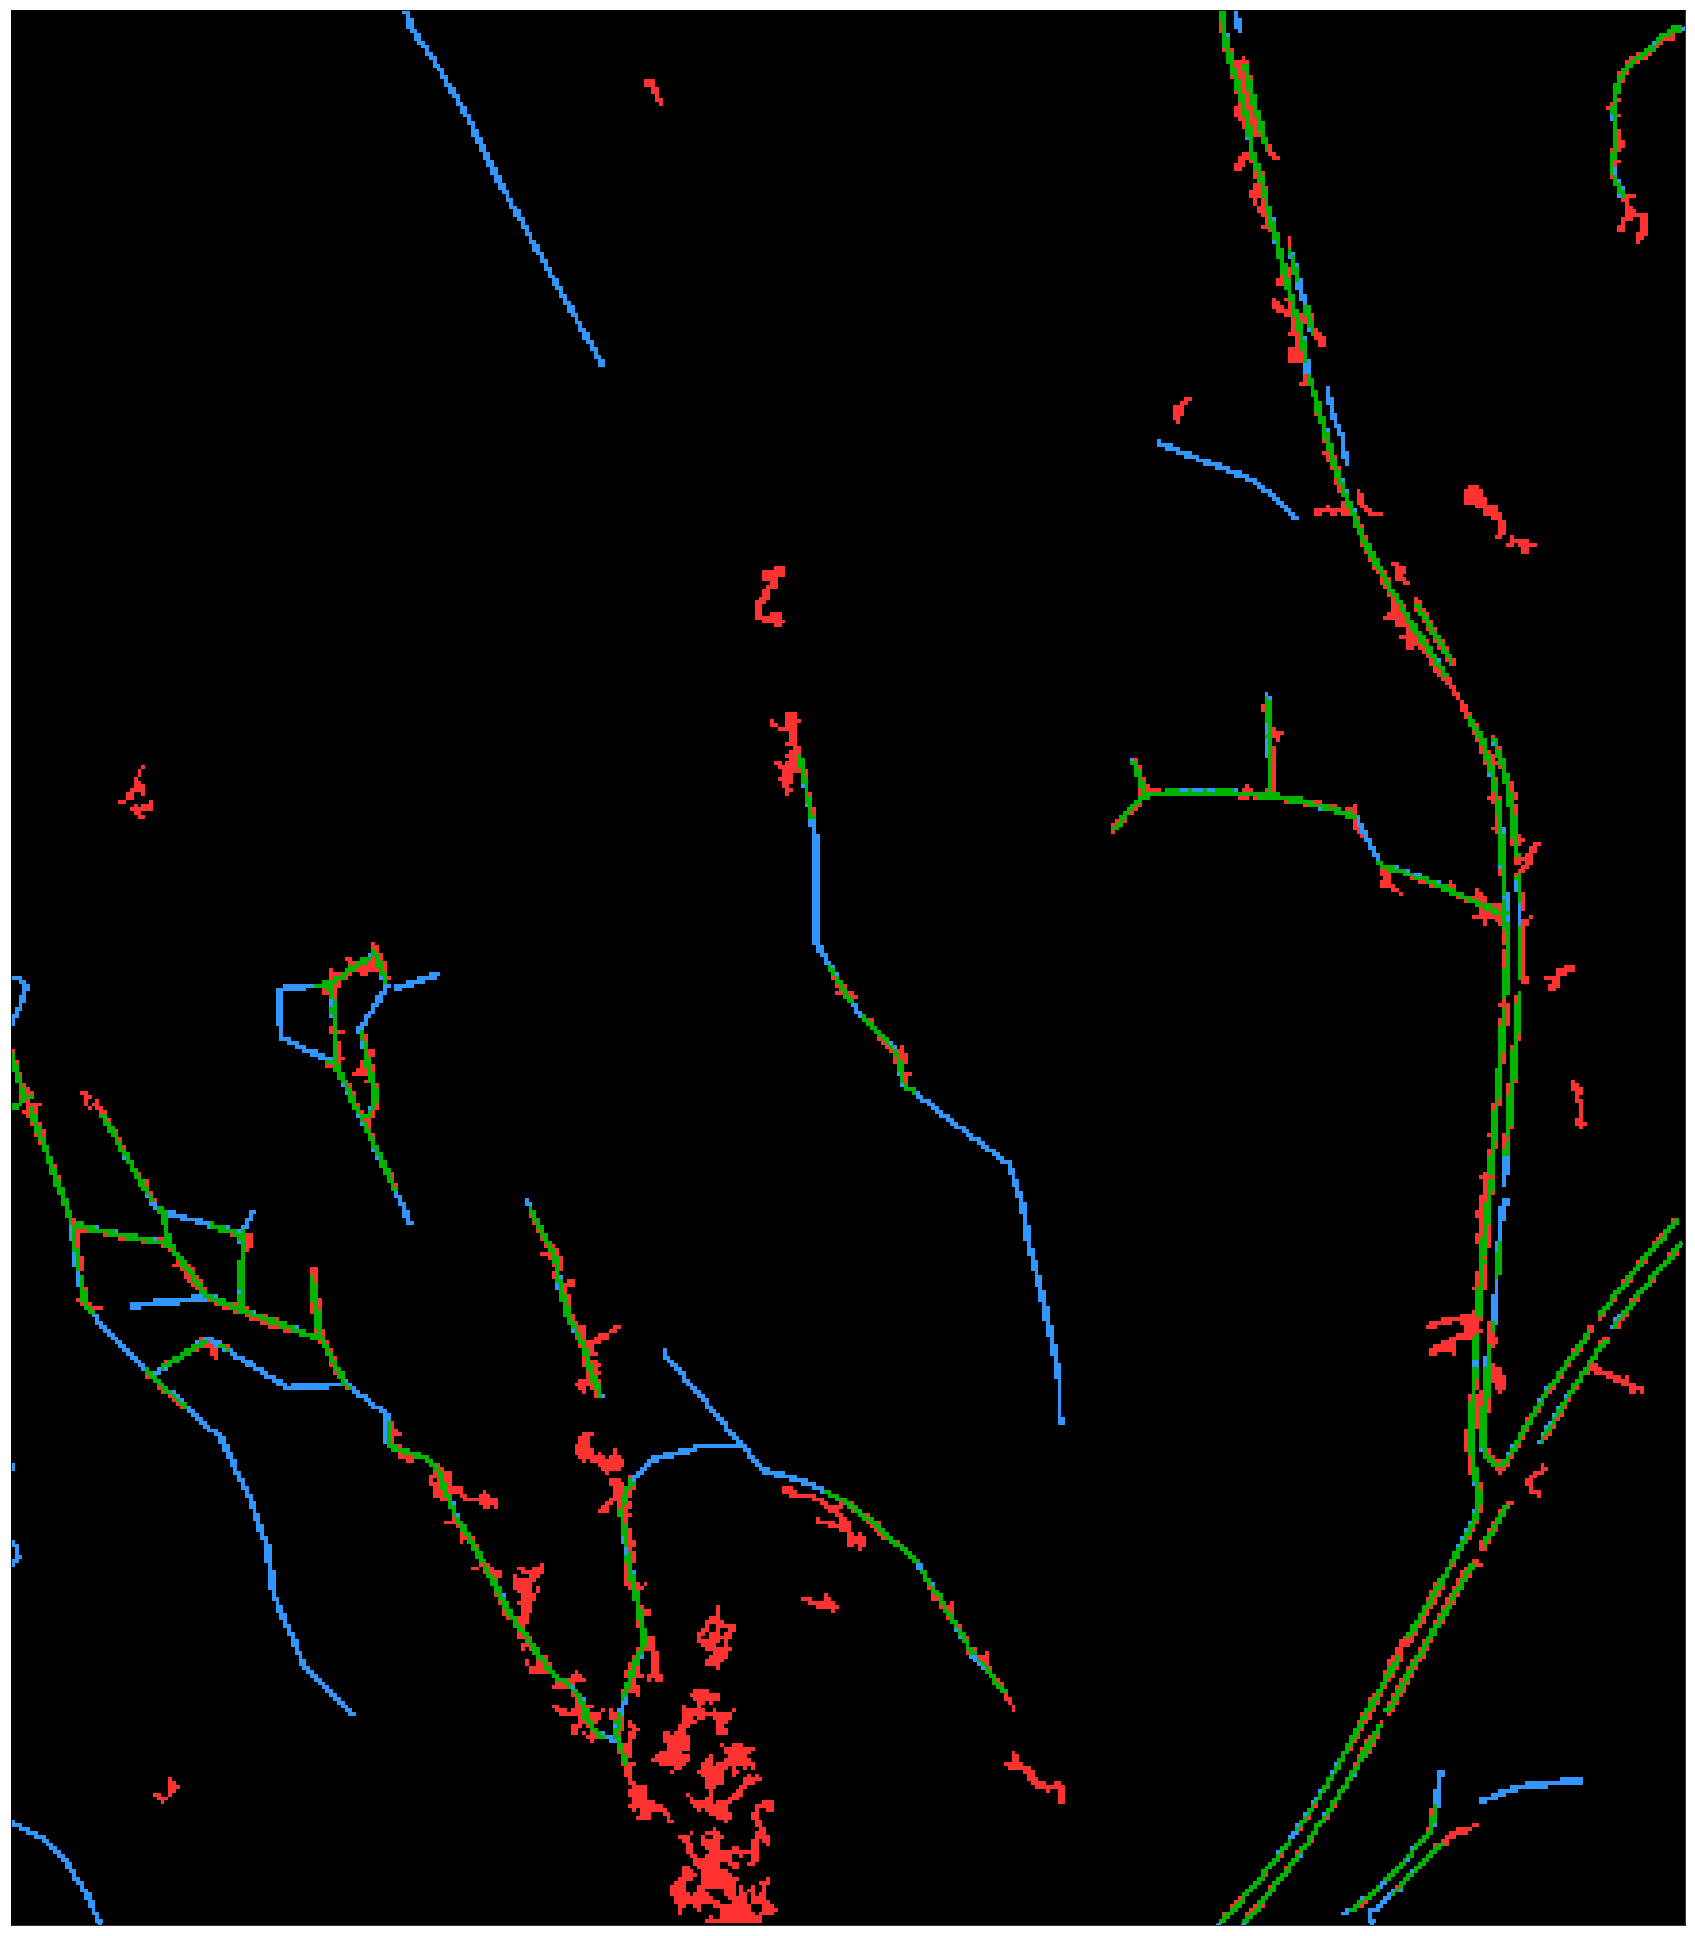

In [23]:
plt.figure(num=None, figsize=(30,180), facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size':22})
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.04)

ax[0].imshow(displayImg)

plt.savefig("results.png", format="png", dpi=200, bbox_inches="tight")